In [83]:

import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
metadata = open('../articles_data/all_articles_with_thumbnail_metadata.json')
papers = json.load(metadata)
#
# docs = [paper['article_title'] + ' ' + paper['abstract'] for paper in papers]
# doc_titles = [paper['article_title'] for paper in papers]
# doc_years = [paper['published_year'] for paper in papers]
#
#
# embeddings = model.encode(docs, show_progress_bar=True)


In [93]:
f = open(f'../embeddings/low_dimension/all_mpnet_base_v2_low_dim.json')
data = json.load(f)
doc_titles = data.keys()
embeddings = data.values()
doc_titles = list(doc_titles)
embeddings = list(embeddings)
docs = [paper['article_title'] + '. ' + paper['abstract'] for paper in papers]
doc_years = [paper['published_year'] for paper in papers]



TypeError: 'list' object is not callable

In [91]:
from sklearn.cluster import DBSCAN


def cluster_docs():
    # umap_embeddings = umap.UMAP(n_neighbors=5,
    #                             n_components=2,
    #                             metric='cosine', random_state=42).fit_transform(embeddings)

    cluster = DBSCAN(eps=0.25, min_samples=3, metric='euclidean').fit(
        embeddings)

    # cluster = hdbscan.HDBSCAN(min_cluster_size=2,
    #                           metric='euclidean',
    #                           cluster_selection_method='eom').fit(umap_embeddings)
    # corpus_embeddings = embeddings /  np.linalg.norm(embeddings, axis=1, keepdims=True)
    # cluster = AgglomerativeClustering(affinity='cosine', linkage='average', distance_threshold=None, n_clusters=22).fit(corpus_embeddings) #, affinity='cosine', linkage='average', distance_threshold=0.4)

    # Prepare data
    # umap_data = umap.UMAP(n_neighbors=5, n_components=2, metric='euclidean', random_state=42).fit_transform(embeddings1)
    umap_data = embeddings
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = cluster.labels_
    result['titles'] = doc_titles
    result['years'] = doc_years

    docs_df = pd.DataFrame(docs, columns=["Doc"])
    docs_df['Topic'] = cluster.labels_
    docs_df['Titles'] = doc_titles
    docs_df['Years'] = doc_years
    docs_df['Doc_ID'] = range(len(docs_df))
    docs_per_topic = docs_df.groupby(['Topic'], as_index=False).agg({'Doc': ' '.join, 'Years': set, 'Titles': len})
    index = list(docs_per_topic.Years)
    years_topic_wise = {i - 1: list(index) for i, index in enumerate(index)}
    return result, cluster, docs_df, docs_per_topic, years_topic_wise

In [92]:


result, cluster, docs_df, docs_per_topic, years_topic_wise = cluster_docs()


ValueError: Expected 2D array, got 1D array instead:
array=[dict_values([[10.498678207397461, 2.4950060844421387], [4.61446475982666, 5.378509998321533], [5.637382507324219, 2.2252249717712402], [5.7367072105407715, 3.7065539360046387], [5.092463493347168, 5.122055530548096], [0.8373774290084839, 6.880946636199951], [7.177156925201416, 3.917980432510376], [2.405465602874756, 2.8277435302734375], [9.523241996765137, 2.8561153411865234], [4.0023932456970215, 2.075071334838867], [4.911052227020264, 0.5579342246055603], [2.1132335662841797, 5.118974685668945], [10.732610702514648, 2.6869959831237793], [4.4530930519104, 5.827140808105469], [4.76653528213501, 0.701545774936676], [3.3604681491851807, 3.476255416870117], [3.1802282333374023, 3.926079273223877], [3.164194345474243, 4.525043964385986], [0.9611470699310303, 6.798748970031738], [8.626026153564453, 4.577199459075928], [1.5902600288391113, 4.848048686981201], [5.200621604919434, 6.13317346572876], [2.025383472442627, 4.533538818359375], [2.6364829540252686, 4.417384147644043], [5.091403961181641, 6.218520641326904], [3.104154348373413, 6.725424766540527], [4.148712635040283, 5.437201976776123], [3.6410512924194336, 6.167717456817627], [2.537025213241577, 9.864604949951172], [3.6910107135772705, 3.4679479598999023], [1.3692350387573242, 4.908712387084961], [3.9962286949157715, 2.9782543182373047], [1.497208833694458, 4.799546718597412], [3.913572072982788, 2.3563716411590576], [9.79162883758545, 2.706105947494507], [4.828571796417236, 0.7010717988014221], [2.0180468559265137, 7.674579620361328], [1.653405785560608, 6.4920125007629395], [5.736952304840088, 2.284179210662842], [1.106040120124817, 6.037428855895996], [2.3267688751220703, 2.7570438385009766], [4.5624284744262695, 4.315737247467041], [1.6884567737579346, 6.359480381011963], [1.9113261699676514, 6.3180718421936035], [1.8730107545852661, 4.192986965179443], [3.9211134910583496, 7.2903523445129395], [3.6449966430664062, 2.841420888900757], [1.4772777557373047, 4.80024528503418], [4.5872979164123535, 5.192887783050537], [4.203763484954834, 5.3172197341918945], [1.7747489213943481, 6.645902156829834], [1.5168415307998657, 6.443100452423096], [3.4661600589752197, 9.769697189331055], [6.008505344390869, 5.413397789001465], [3.1364994049072266, 9.986495971679688], [4.057071208953857, 3.6136767864227295], [1.989046573638916, 4.412588119506836], [10.850600242614746, 2.517803430557251], [6.121271133422852, 5.254753112792969], [2.3767309188842773, 2.93829083442688], [3.2953994274139404, 3.802204132080078], [5.8348212242126465, 1.9447404146194458], [2.315183401107788, 4.164032459259033], [2.2297744750976562, 8.02682876586914], [4.3521928787231445, 6.109979152679443], [1.9335041046142578, 5.38411283493042], [3.15024995803833, 6.685917854309082], [4.071169376373291, 4.555313587188721], [3.3013477325439453, 9.761200904846191], [2.0606954097747803, 6.704505443572998], [5.897181034088135, 1.8825727701187134], [2.7164154052734375, 4.061515808105469], [6.8697943687438965, 3.653000831604004], [3.92203688621521, 3.595395803451538], [6.313807487487793, 2.2539119720458984], [3.8653886318206787, 6.539864540100098], [4.5016188621521, 5.502364158630371], [2.17893385887146, 4.52039098739624], [1.24200439453125, 6.818181991577148], [4.617999076843262, 1.3706163167953491], [2.4436542987823486, 2.7130608558654785], [4.6088995933532715, 1.2822095155715942], [3.707639455795288, 5.095256805419922], [3.8339545726776123, 6.608774185180664], [3.8157174587249756, 5.281883716583252], [2.4309792518615723, 9.843421936035156], [3.2926177978515625, 9.526979446411133], [9.539668083190918, 2.9876997470855713], [1.0950064659118652, 6.945082187652588], [3.3279857635498047, 3.398289918899536], [10.763471603393555, 2.6267244815826416], [2.3843531608581543, 2.71053147315979], [3.165494441986084, 4.64116096496582], [6.257472515106201, 2.2369070053100586], [4.032294750213623, 7.226275444030762], [10.074969291687012, 2.5999441146850586], [4.7169952392578125, 0.7634701728820801], [9.490517616271973, 2.880019426345825], [4.135227680206299, 2.492954730987549], [2.3200416564941406, 6.384459495544434], [4.598565101623535, 1.8058736324310303], [5.494466781616211, 5.137228012084961], [8.51417350769043, 4.722441673278809], [8.423492431640625, 5.155764579772949], [3.161595344543457, 6.73692512512207], [3.3113765716552734, 9.982275009155273], [1.4183284044265747, 6.490829944610596], [3.768890857696533, 6.915440559387207], [2.8722121715545654, 9.613295555114746], [4.210437297821045, 6.326013088226318], [6.962904930114746, 3.747053861618042], [3.119600772857666, 9.104178428649902], [4.901517391204834, 1.7928630113601685], [6.710193634033203, 3.4793238639831543], [10.779207229614258, 2.7663309574127197], [8.501463890075684, 5.186078071594238], [3.279557943344116, 2.9046735763549805], [10.937307357788086, 2.55442476272583], [10.860376358032227, 2.5825369358062744], [9.596399307250977, 2.7727887630462646], [1.9468700885772705, 4.079174995422363], [2.083949089050293, 5.441740036010742], [4.255252838134766, 4.144413948059082], [2.1801559925079346, 6.833878993988037], [3.0750856399536133, 9.64079761505127], [4.24769926071167, 6.244449615478516], [8.238950729370117, 5.005826473236084], [5.801332473754883, 1.9704378843307495], [6.196903228759766, 2.461303472518921], [9.715082168579102, 3.3149197101593018], [3.0159175395965576, 3.2326278686523438], [6.018533229827881, 3.5448720455169678], [10.93946647644043, 2.5075390338897705], [4.163573265075684, 4.2916154861450195], [1.7123286724090576, 6.831911563873291], [6.2333221435546875, 2.171586513519287], [3.3230788707733154, 6.605677127838135], [2.681565046310425, 9.576887130737305], [5.976883888244629, 2.5791471004486084], [2.9854419231414795, 9.718994140625], [6.333976745605469, 5.158662796020508], [3.996668577194214, 4.369392395019531], [1.6365891695022583, 6.713877201080322], [2.4898252487182617, 6.843005180358887], [6.504355430603027, 3.3309824466705322], [6.724125385284424, 2.2442827224731445], [3.7047269344329834, 3.212956190109253], [10.200824737548828, 2.852886199951172], [3.445188522338867, 9.990686416625977], [4.227588653564453, 6.2641215324401855], [4.428717613220215, 4.193325519561768], [1.7090294361114502, 6.502856254577637], [5.725052356719971, 3.697888135910034], [5.711196422576904, 2.817211389541626], [3.4770803451538086, 2.9189720153808594], [6.310354232788086, 5.135009288787842], [1.6438535451889038, 7.254022598266602], [10.636340141296387, 2.6404647827148438], [3.2918057441711426, 9.449002265930176], [2.889256000518799, 9.689805030822754], [4.04700231552124, 7.1850786209106445], [5.631304740905762, 2.1557369232177734], [3.8554577827453613, 6.657565593719482], [6.1650543212890625, 5.26582670211792], [10.792531967163086, 2.6986145973205566], [2.6585729122161865, 3.7335851192474365], [2.494758367538452, 5.204667091369629], [0.9271665811538696, 6.68246603012085], [1.9000239372253418, 4.435198783874512], [8.340214729309082, 4.8658366203308105], [3.046698570251465, 3.5187110900878906], [9.940252304077148, 2.9759719371795654], [2.292898654937744, 6.198479175567627], [3.5896339416503906, 2.8486106395721436], [2.4998583793640137, 9.838909149169922], [5.170759677886963, 5.006043434143066], [3.4767441749572754, 9.86691665649414], [5.233256816864014, 5.050649642944336], [9.72182846069336, 2.559420108795166], [6.120327949523926, 5.256642818450928], [2.201117515563965, 4.5206217765808105], [8.462991714477539, 5.183184623718262], [1.296560525894165, 6.565071105957031], [2.1664726734161377, 7.940455436706543], [6.138711452484131, 2.392221450805664], [6.373693466186523, 3.2541770935058594], [6.2901082038879395, 3.41983699798584], [3.8909780979156494, 5.711472988128662], [2.867363214492798, 9.659424781799316], [8.641135215759277, 4.521186351776123], [10.713091850280762, 2.6161539554595947], [3.2017674446105957, 3.4511706829071045], [2.5531392097473145, 9.794004440307617], [8.754778861999512, 4.321991920471191], [3.160227060317993, 4.839516639709473], [6.405707836151123, 5.040002346038818], [6.285050868988037, 2.1060311794281006], [1.9927371740341187, 5.297900676727295], [4.3396711349487305, 5.684872150421143], [3.98022198677063, 6.498934745788574], [3.8472049236297607, 5.8751397132873535], [4.315377712249756, 1.825825572013855], [8.524709701538086, 5.027769088745117], [4.046352863311768, 3.554171085357666], [0.8883283138275146, 6.804779529571533], [4.367112159729004, 4.605965614318848], [1.6213728189468384, 6.7973456382751465], [4.230453014373779, 2.732220411300659], [10.364861488342285, 2.6799659729003906], [6.610149383544922, 3.039597988128662], [4.216011047363281, 6.538195610046387], [2.4117798805236816, 2.623013734817505], [2.696807622909546, 5.165450572967529], [4.792389392852783, 4.296636581420898], [4.412272930145264, 2.6804938316345215], [1.1678439378738403, 6.458486557006836], [5.232367515563965, 4.6788225173950195], [8.342300415039062, 5.138654708862305], [4.326042652130127, 2.595719575881958], [6.654963970184326, 3.2973787784576416], [3.9803178310394287, 2.562201738357544], [3.676194429397583, 5.354745388031006], [2.3545475006103516, 2.802497148513794], [4.129358768463135, 3.977233409881592], [4.9059648513793945, 5.191860675811768], [9.341737747192383, 3.196758985519409], [3.4246726036071777, 9.88372802734375], [4.514675140380859, 1.4354145526885986], [9.700821876525879, 2.8003265857696533], [9.112887382507324, 3.826479196548462], [4.816032409667969, 5.227389335632324], [9.005175590515137, 3.7154059410095215], [4.0433430671691895, 7.204566478729248], [9.813813209533691, 2.9659478664398193], [3.5943400859832764, 6.539677619934082], [4.730196475982666, 0.7629390954971313]])].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [80]:
results_new = docs_per_topic.Years.values
print(results_new)

initial = [['2001', '2002', '2003'],
           ['2003', '2004', '2001'], ['2002', '2005', '2005'],
           ['2001', '2004', '2005']]

all_years = ['2008', '2010', '2012', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

count_dict = []
for list in results_new:
    result = []
    for year in all_years:
        if list.count(year) > 0:
            result.append(list.count(year))
        else:
            result.append(0)
    count_dict.append(result)

print(len(count_dict))



[list(['2019', '2018', '2008', '2017', '2019', '2017', '2017', '2016', '2008', '2012', '2020', '2019', '2018', '2018', '2008', '2015', '2008', '2019', '2012', '2008', '2012', '2019', '2012', '2016', '2015', '2019', '2021', '2012', '2008', '2014', '2021', '2008', '2014', '2016', '2014', '2020', '2012', '2014', '2008', '2010', '2010', '2014', '2008', '2008', '2019', '2015', '2020', '2008', '2014', '2014'])
 list(['2019', '2017', '2016', '2020', '2016', '2019', '2017', '2008', '2016', '2019', '2019', '2014', '2015'])
 list(['2019', '2008', '2019', '2010', '2010', '2016', '2008', '2018', '2015', '2016'])
 list(['2018', '2021', '2020'])
 list(['2020', '2020', '2018', '2020', '2020', '2015'])
 list(['2015', '2018', '2015', '2020', '2017', '2015', '2015'])
 list(['2012', '2015', '2014', '2020', '2019', '2016', '2015', '2018', '2018'])
 list(['2019', '2019', '2020', '2017', '2017'])
 list(['2010', '2015', '2021', '2017'])
 list(['2012', '2008', '2017', '2010', '2012', '2018', '2018', '2014', '

In [ ]:
def c_tf_idf(documents, m, ngram_range=(1, 2)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [ ]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))

In [59]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [words[j] for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

In [60]:
def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                   .Doc
                   .count()
                   .reset_index()
                   .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                   .sort_values("Size", ascending=False))
    return topic_sizes

In [61]:
docs_per_topic

,Topic,Doc,Years,Titles
0,-1,Pelvis Runner: Visualizing Pelvic Organ Variab...,"[2019, 2018, 2008, 2017, 2019, 2017, 2017, 201...",50
1,0,Interactive Exploded Views for Molecular Struc...,"[2019, 2017, 2016, 2020, 2016, 2019, 2017, 200...",13
2,1,Layer-Aware iOCT Volume Rendering for Retinal ...,"[2019, 2008, 2019, 2010, 2010, 2016, 2008, 201...",10
3,2,Introducing CNN-Based Mouse Grim Scale Analysi...,"[2018, 2021, 2020]",3
4,3,VR Acrophobia Treatment - Development of Custo...,"[2020, 2020, 2018, 2020, 2020, 2015]",6
5,4,CoWRadar: Visual Quantification of the Circle ...,"[2015, 2018, 2015, 2020, 2017, 2015, 2015]",7
6,5,Atomistic Visualization of Mesoscopic Whole-Ce...,"[2012, 2015, 2014, 2020, 2019, 2016, 2015, 201...",9
7,6,Multiparametric Magnetic Resonance Image Synth...,"[2019, 2019, 2020, 2017, 2017]",5
8,7,Estimation of the Midsagittal Plane for Sidene...,"[2010, 2015, 2021, 2017]",4
9,8,Synaptic Connectivity in Anatomically Realisti...,"[2012, 2008, 2017, 2010, 2012, 2018, 2018, 201...",11


/Users/prush/opt/miniconda3/envs/doc_emb/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/var/folders/l5/wmvcg4v54jj1mdfc17dxh5rr0000gq/T/ipykernel_19618/681194569.py:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/l5/wmvcg4v54jj1mdfc17dxh5rr0000gq/T/ipykernel_19618/681194569.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

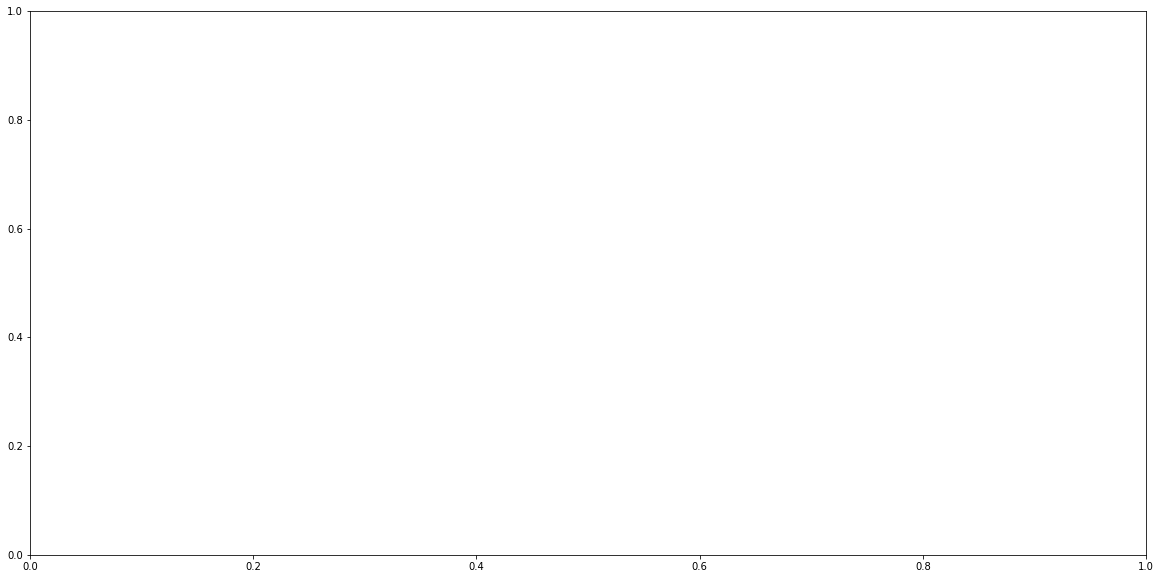

In [62]:


top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=10)

from collections import Counter
import plotly.graph_objects as go
import plotly.io as pio

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

# outlier_years = list(years_topic_wise[-1])
clustered_years = [value for key, value in years_topic_wise.items() if key != 1]

plot_top = Counter()
top_terms = top_n_words

num = []
for key, a in top_terms.items():
    k = []
    for i in a:
        for j in a:
            if i != j and i in j:
                k.append(i)

    r = list(filter(lambda i: i not in k, a))
    top_terms[key] = r

for b in clustered_years:
    k = b
    k = b.sort()

topic_years = ['.'.join(str(e) for e in years_topic_wise[item]) for item in clustered.labels]
topic_years_outliers = ['.'.join(str(e) for e in years_topic_wise[item]) for item in outliers.labels]

top_terms_docs = ['.'.join(str(e) for e in top_terms[item]) for item in clustered.labels]
top_terms_docs_outliers = ['.'.join(str(e) for e in top_terms[item]) for item in outliers.labels]

df1 = pd.DataFrame({'doc_terms_outliers': top_terms_docs_outliers, 'doc_years_outliers': topic_years_outliers})

df2 = pd.DataFrame({'doc_terms': top_terms_docs, 'doc_years': topic_years})

pio.renderers.default = "browser"
import plotly.express as px

color_discrete_sequence = ["#CD6155", '#9a4979', '#62b9cc', '#873600', '#117A65', '#de881f', '#CB4335',
                           '#c43f93', '#3dccd1', '#e07141', '#e041a0', '#0f00cd', '#ffa700', '#d62d20', '#008844',
                           '#72bd68', '#ba434f', '#48c2ba', '#945edb', '#e206cb', '#cfd63c', '#ca3bf9', '#bfc403',
                           '#ba0e37', '#9aa655', '#8e471b', '#473100',
                           '#fda025', '#21618C', '#6C3483', '#91ca1e', '#EB984E', '#239B56', '#1A5276']

clustered['Publication Years'] = topic_years
clustered['Topic Words'] = top_terms_docs
clustered['Cluster Number'] = clustered.labels
fig = px.scatter(clustered, x='x', y='y', hover_name='titles', color='Topic Words',
                 # labels={"Topic Words" : "Topics"},
                 hover_data=['Publication Years', 'Cluster Number'], color_discrete_sequence=color_discrete_sequence)

fig.add_trace(go.Scatter(x=outliers.x, y=outliers.y, customdata=df1, mode='markers', hovertext=outliers.titles,
                         name='outliers',
                         marker=dict(
                             color='#BDBDBD',
                         ),
                         hoverlabel=dict(
                             bgcolor="#ffffff",
                             font_size=12,
                             font_color="#141414",
                             font_family="Calibri",
                             bordercolor="#BDBDBD",
                         ),
                         hovertemplate='<b>%{hovertext}<br></b><br><br>Topic= %{customdata[0]}</br>Years = %{customdata[1]}<br>'
                         ))
fig.update_traces(textposition='top center')
fig.update_layout(
    margin=dict(l=5, r=5, b=30),
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(
        showline=True,
        showgrid=True,
        linecolor='#666666',
        tickfont=dict(
            family='poppins',
            color='#666666'
        )
    ),
    yaxis=dict(  # attribures for y axis
        showline=True,
        showgrid=True,
        linecolor='#666666',
        tickfont=dict(
            family='poppins',
            color='#666666'
        )
    ),
    hoverlabel=dict(
        bgcolor="#ffffff",
        font_size=12,
        font_color="#141414",
        font_family="Calibri",
        bordercolor="#204ab3",
    ),
    plot_bgcolor='white',
)


In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6.6))
B = pd.DataFrame()
ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A,
                 cbar_kws={'label': 'Number of articles',
                           'extend': 'max',
                           'ticks': [1, 2, 3]},
                 cmap=, vmin=1, vmax=3, cbar=True, ax=ax,
                 annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08,
                 linecolor='lightgray', fmt='.4f')
# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks([1.5, 2])
# colorbar.set_ticklabels(['1', '2'])
plt.show()

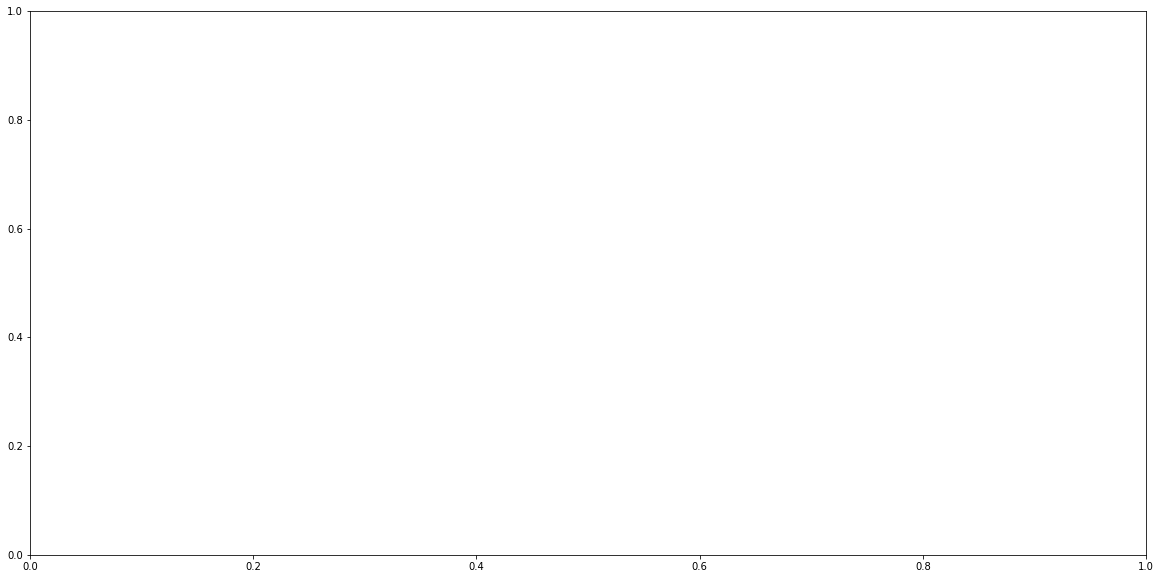

In [264]:


top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=10)

from collections import Counter
import plotly.graph_objects as go
import plotly.io as pio

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

# outlier_years = list(years_topic_wise[-1])
clustered_years = [value for key, value in years_topic_wise.items() if key != 1]

plot_top = Counter()
top_terms = top_n_words

num = []
for key, a in top_terms.items():
    k = []
    for i in a:
        for j in a:
            if i != j and i in j:
                k.append(i)

    r = list(filter(lambda i: i not in k, a))
    top_terms[key] = r

for b in clustered_years:
    k = b
    k = b.sort()

topic_years = ['.'.join(str(e) for e in years_topic_wise[item]) for item in clustered.labels]
topic_years_outliers = ['.'.join(str(e) for e in years_topic_wise[item]) for item in outliers.labels]

top_terms_docs = ['.'.join(str(e) for e in top_terms[item]) for item in clustered.labels]
top_terms_docs_outliers = ['.'.join(str(e) for e in top_terms[item]) for item in outliers.labels]

df1 = pd.DataFrame({'doc_terms_outliers': top_terms_docs_outliers, 'doc_years_outliers': topic_years_outliers})

df2 = pd.DataFrame({'doc_terms': top_terms_docs, 'doc_years': topic_years})

pio.renderers.default = "browser"
import plotly.express as px

color_discrete_sequence = ["#CD6155", '#9a4979', '#62b9cc', '#873600', '#117A65', '#de881f', '#CB4335',
                           '#c43f93', '#3dccd1', '#e07141', '#e041a0', '#0f00cd', '#ffa700', '#d62d20', '#008844',
                           '#72bd68', '#ba434f', '#48c2ba', '#945edb', '#e206cb', '#cfd63c', '#ca3bf9', '#bfc403',
                           '#ba0e37', '#9aa655', '#8e471b', '#473100',
                           '#fda025', '#21618C', '#6C3483', '#91ca1e', '#EB984E', '#239B56', '#1A5276']

clustered['Publication Years'] = topic_years
clustered['Topic Words'] = top_terms_docs
clustered['Cluster Number'] = clustered.labels
fig = px.scatter(clustered, x='x', y='y', hover_name='titles', color='Topic Words',
                 # labels={"Topic Words" : "Topics"},
                 hover_data=['Publication Years', 'Cluster Number'], color_discrete_sequence=color_discrete_sequence)

fig.add_trace(go.Scatter(x=outliers.x, y=outliers.y, customdata=df1, mode='markers', hovertext=outliers.titles,
                         name='outliers',
                         marker=dict(
                             color='#BDBDBD',
                         ),
                         hoverlabel=dict(
                             bgcolor="#ffffff",
                             font_size=12,
                             font_color="#141414",
                             font_family="Calibri",
                             bordercolor="#BDBDBD",
                         ),
                         hovertemplate='<b>%{hovertext}<br></b><br><br>Topic= %{customdata[0]}</br>Years = %{customdata[1]}<br>'
                         ))
fig.update_layout(
    margin=dict(l=5, r=5, b=30),
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(
        showline=True,
        showgrid=True,
        linecolor='#666666',
        tickfont=dict(
            family='poppins',
            color='#666666'
        )
    ),
    yaxis=dict(  # attribures for y axis
        showline=True,
        showgrid=True,
        linecolor='#666666',
        tickfont=dict(
            family='poppins',
            color='#666666'
        )
    ),
    hoverlabel=dict(
        bgcolor="#ffffff",
        font_size=12,
        font_color="#141414",
        font_family="Calibri",
        bordercolor="#204ab3",
    ),
    plot_bgcolor='white',
)


In [478]:
# dis = top_n_words
# for k, v in dis.items():
#     i = ', '.join(v)
#     dis[k]=i
# dis

In [256]:
# yr =years_topic_wise
# for k, v in yr.items():
#     i = ', '.join(v)
#     yr[k]=i
# yr

['simulation', 'stress', 'blood vessels', 'mitral valve']


In [258]:
# result = {}
# for k, v in dis.items():
#     l = v + ' & ' + yr[k]
#     result[k] = l
# result

['simulation', 'stress', 'blood vessels', 'mitral valve']

In [ ]:
# c = [len(v) for v in top_terms.values()]
# print(min(c))
# for k, v in top_terms.items():
#     top_terms[k] = sample(v[::len(v) // min(c)], min(c))

